Summary of Key Steps:
Load and Clean Data: Ensure you have clean, time-indexed data for Median_Price, Population, and Income.
Transform to Long Format: Convert data into a long format suitable for time series analysis, and align it by Date.
Train-Test Split: Split the data into train and forecast sets based on a cutoff date (e.g., March 2022).
Fit AutoARIMA: Use AutoARIMA to model Median_Price, with population and income as exogenous variables.
Forecast Future Quarters: Predict future rental prices based on the exogenous population and income data for 2022-2024.
Analyze Results: Store the forecast and calculate potential growth rates if required.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../data/curated/AllProperties.csv')
df.loc[df['Suburb'] == 'Wanagaratta', 'Suburb'] = 'Wangaratta'

In [3]:
df.columns = df.columns.str.strip()

years = [2018, 2019, 2020, 2021, 2022, 2023]
df_weekly_rent = df[['Suburb']].copy()

for year in years:
    year_cols = [col for col in df.columns if col.startswith(str(year))]
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

    df_temp = df[year_cols].replace(0, np.nan)
    avg_without_zeros = df_temp.mean(axis=1, skipna=True)

    all_zero_mask = (df[year_cols] == 0).all(axis=1)
    column_name = f"{year}_weekly_rent"
    df_weekly_rent[column_name] = np.where(all_zero_mask, 0, avg_without_zeros)

df_weekly_rent

,Suburb,2018_weekly_rent,2019_weekly_rent,2020_weekly_rent,2021_weekly_rent,2022_weekly_rent,2023_weekly_rent
0,Albert Park-Middle Park-West St Kilda,737.375,720.875,702.750,711.250,684.375,665.5
1,Armadale,702.125,624.000,621.500,628.000,642.250,620.5
2,Carlton North,535.625,537.875,564.875,587.625,573.000,555.0
3,Carlton-Parkville,2418.875,2458.875,2663.875,2615.250,3372.250,3545.0
4,CBD-St Kilda Rd,5352.125,5629.750,6095.625,8814.125,9021.500,8963.0
...,...,...,...,...,...,...,...
141,Traralgon,691.375,621.500,594.375,593.750,633.500,644.0
142,Wangaratta,451.875,460.375,473.125,450.250,457.375,449.0
143,Warragul,398.875,420.625,465.875,459.750,465.250,468.5
144,Warrnambool,751.125,695.750,663.000,614.750,633.375,643.5


In [4]:
df_new = df_weekly_rent.copy()

population_years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]
for year in population_years:
    
    # initialise population columns
    population_column_name = f"{year}_population"
    df_new[population_column_name] = 0
    
    # initialise income columns
    income_column_name = f"{year}_income"
    df_new[income_column_name] = 0.0

df_new

,Suburb,2018_weekly_rent,2019_weekly_rent,2020_weekly_rent,2021_weekly_rent,2022_weekly_rent,2023_weekly_rent,2018_population,2018_income,2019_population,...,2022_population,2022_income,2023_population,2023_income,2024_population,2024_income,2025_population,2025_income,2026_population,2026_income
0,Albert Park-Middle Park-West St Kilda,737.375,720.875,702.750,711.250,684.375,665.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,Armadale,702.125,624.000,621.500,628.000,642.250,620.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,Carlton North,535.625,537.875,564.875,587.625,573.000,555.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,Carlton-Parkville,2418.875,2458.875,2663.875,2615.250,3372.250,3545.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,CBD-St Kilda Rd,5352.125,5629.750,6095.625,8814.125,9021.500,8963.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,691.375,621.500,594.375,593.750,633.500,644.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
142,Wangaratta,451.875,460.375,473.125,450.250,457.375,449.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
143,Warragul,398.875,420.625,465.875,459.750,465.250,468.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
144,Warrnambool,751.125,695.750,663.000,614.750,633.375,643.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [32]:
df_population = pd.read_csv('../../data/curated/population_by_sa2.csv')
df_income = pd.read_csv('../../data/curated/income_by_sa2.csv')

In [33]:
df_population

,Label,estimated_population_2018,estimated_population_2019,estimated_population_2020,estimated_population_2021,estimated_population_2022,estimated_population_2023,estimated_population_2024,estimated_population_2025,estimated_population_2026
0,Abbotsford,9527,9594,9672,9258,9513,10008,10527.676824,10914.578045,11189.069984
1,Airport West,8169,8390,8362,8240,8295,8464,8683.181491,8896.540332,9093.092637
2,Albert Park,16728,17081,16955,16011,16177,16861,17665.062455,18280.665009,18706.847174
3,Alexandra,6646,6687,6690,6771,6794,6836,6915.938566,7038.105197,7186.668076
4,Alfredton,13537,14434,15507,16841,18002,18997,19771.949269,20395.671019,20940.982750
...,...,...,...,...,...,...,...,...,...,...
512,Yarram,5437,5474,5545,5555,5588,5580,5594.979256,5653.608883,5754.511887
513,Yarraville,15991,16092,16068,15651,15661,16020,16523.217961,16987.482063,17369.407751
514,Yarrawonga,8297,8418,8508,8593,8727,8812,8901.992448,9023.455120,9184.454667
515,Yarriambiack,6639,6617,6583,6453,6376,6327,6344.344429,6418.401396,6530.575937


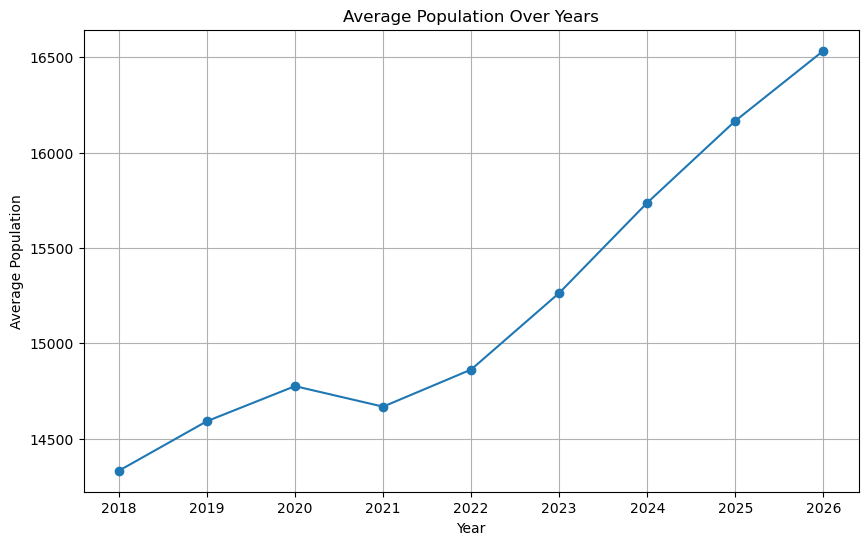

In [34]:
import matplotlib.pyplot as plt
pop_2018 = df_population['estimated_population_2018'].mean()
pop_2019 = df_population['estimated_population_2019'].mean()
pop_2020 = df_population['estimated_population_2020'].mean()
pop_2021 = df_population['estimated_population_2021'].mean()
pop_2022 = df_population['estimated_population_2022'].mean()
pop_2023 = df_population['estimated_population_2023'].mean()
pop_2024 = df_population['estimated_population_2024'].mean()
pop_2025 = df_population['estimated_population_2025'].mean()
pop_2026 = df_population['estimated_population_2026'].mean()

years = ['2018', '2019', '2020', '2021', '2022', '2023','2024','2025','2026']
populations = [pop_2018, pop_2019, pop_2020, pop_2021, pop_2022, pop_2023, pop_2024, pop_2025, pop_2026]

plt.figure(figsize=(10, 6))
plt.plot(years, populations, marker='o')
plt.title('Average Population Over Years')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()


In [35]:
with open('../../notebooks/Julian/missing_suburbs.txt') as f:
    missing_suburbs = f.read().splitlines()

In [36]:
suburb_count = {}

for label in df_income.Label:
    if label in missing_suburbs:
        continue
    found = False
    for suburb in df_weekly_rent.Suburb.values:
        if label == 'Carlton' and suburb == 'Carlton-Parkville' or \
        label == 'Keilor' and suburb == 'Keilor' or \
        label == 'Pascoe Vale' and suburb == 'Pascoe Vale-Coburg North' or \
        label == 'Bendigo Surrounds - North' and suburb == 'North Bendigo' or \
        label == 'East Bendigo - Kennington' and suburb == 'Flora Hill-Bendigo East' or \
        label == 'Brunswick East' and suburb == 'East Brunswick' or \
        label == 'Brunswick West' and suburb == 'West Brunswick' or \
        label == 'Carlton North - Princes Hill' and suburb == 'Carlton North' or \
        label == 'Dandenong - North' and suburb == 'Dandenong North-Endeavour Hills' or \
        label == 'Dandenong - South' and suburb == 'Dandenong' or \
        label == 'Gladstone Park - Westmeadows' and suburb == 'Gladstone Park-Tullamarine' or \
        label == 'Hawthorn East' and suburb == 'East Hawthorn' or \
        label == 'Highett (West) - Cheltenham' and suburb == 'Cheltenham' or \
        label == 'Ivanhoe East - Eaglemont' and suburb == 'Ivanhoe-Ivanhoe East' or \
        label == 'North Geelong - Bell Park' and suburb == 'North Geelong' or \
        label == 'Research - North Warrandyte' and suburb == 'Eltham-Research-Montmorency' or \
        label == 'Geelong West - Hamlyn Heights' and suburb == 'Herne Hill-Geelong West' or \
        label == 'St Kilda - Central' and suburb == 'St Kilda' or \
        label == 'St Kilda - West' and suburb == 'Albert Park-Middle Park-West St Kilda' or \
        label == 'St Kilda East' and suburb == 'East St Kilda' or \
        label == 'West Footscray - Tottenham' and suburb == 'West Footscray' or \
        'Berwick' in label and 'Berwick' in suburb or \
        'Bundoora' in label and 'Bundoora' in suburb or \
        'Clayton' in label and 'Clayton' in suburb or \
        'Craigieburn' in label and 'Craigieburn' in suburb or \
        'Croydon' in label and 'Croydon' in suburb or \
        'Doncaster East' in label and 'Doncaster East' in suburb or \
        'Endeavour Hills' in label and 'Endeavour Hills' in suburb or \
        'Epping' in label and 'Epping' in suburb or \
        'Essendon' in label and 'Essendon' in suburb or \
        'Ferntree Gully' in label and 'Ferntree Gully' in suburb or \
        'Glen Waverley' in label and 'Glen Waverley' in suburb or \
        'Glenroy' in label and 'Glenroy' in suburb or \
        'Hampton Park' in label and 'Hampton Park' in suburb or \
        'Hoppers Crossing' in label and 'Hoppers Crossing' in suburb or \
        'Kew' in label and 'Kew' in suburb or \
        'Lalor' in label and 'Lalor' in suburb or \
        'CBD' in label and 'CBD' in suburb or \
        'Mildura' in label and 'Mildura' in suburb or \
        'Mill Park' in label and 'Mill Park' in suburb or \
        'Mornington' in label and 'Mornington' in suburb or \
        'Mount Waverley' in label and 'Mount Waverley' in suburb or \
        'Narre Warren' in label and 'Narre Warren' in suburb or \
        'Noble Park' in label and 'Noble Park' in suburb or \
        'Northcote' in label and 'Northcote' in suburb or \
        'Pakenham' in label and 'Pakenham' in suburb or \
        'Preston' in label and 'Preston' in suburb or \
        'Reservoir' in label and 'Reservoir' in suburb or \
        'Richmond' in label and 'Richmond' in suburb or \
        'Rowville' in label and 'Rowville' in suburb or \
        'Roxburgh' in label and 'Roxburgh' in suburb or \
        'Shepparton' in label and 'Shepparton' in suburb or \
        'South Yarra' in label and 'South Yarra' in suburb or \
        'Southbank' in label and 'Southbank' in suburb or \
        'Albans' in label and 'Albans' in suburb or \
        'Surrey' in label and 'Surrey' in suburb or \
        'Traralgon' in label and 'Traralgon' in suburb or \
        'Warrnambool' in label and 'Warrnambool' in suburb or \
        'Werribee' in label and 'Werribee' in suburb or \
        'West Melbourne' in label and 'West Melbourne' in suburb or \
        label in suburb:
            found = True
            if suburb not in suburb_count:
                suburb_count[suburb] = 1
            else:
                suburb_count[suburb] += 1

            # population
            df_new.loc[df_new['Suburb'] == suburb, '2018_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2018'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2019_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2019'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2020_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2020'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2021_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2021'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2022_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2022'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2023_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2023'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2024_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2024'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2025_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2025'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2026_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2026'].values[0])

            # income
            df_new.loc[df_new['Suburb'] == suburb, '2018_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2018'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2019_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2019'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2020_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2020'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2021_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2021'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2022_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2022'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2023_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2023'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2024_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2024'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2025_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2025'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2026_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2026'].values[0])

# average median income for suburbs with multiple SA2s
for suburb in suburb_count:
    if suburb_count[suburb] > 1:
        df_new.loc[df_new['Suburb'] == suburb, '2018_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2019_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2020_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2021_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2022_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2023_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2024_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2025_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2026_income'] /= suburb_count[suburb]

In [37]:
df_new = df_new[['Suburb'] + sorted(df_new.columns.drop('Suburb'))]
df_new = df_new[(df_new != 0).all(axis=1)].reset_index(drop=True)
df_new

,Suburb,2018_income,2018_population,2018_weekly_rent,2019_income,2019_population,2019_weekly_rent,2020_income,2020_population,2020_weekly_rent,...,2022_weekly_rent,2023_income,2023_population,2023_weekly_rent,2024_income,2024_population,2025_income,2025_population,2026_income,2026_population
0,Albert Park-Middle Park-West St Kilda,129800.0,33456,737.375,131760.00,34162,720.875,137672.00,33910,702.750,...,684.375,154001.839067,33722,665.5,160479.843039,35330,166111.185176,36560,172662.990452,37412
1,Armadale,109934.0,176136,702.125,113652.00,183086,624.000,116874.00,189940,621.500,...,642.250,131366.552557,210188,620.5,136751.533773,218556,142365.547223,225618,147771.490741,231306
2,Carlton North,64101.0,59712,535.625,66717.00,60046,537.875,68578.50,59528,564.875,...,573.000,77976.916258,59814,555.0,81521.695868,67978,85045.780382,73498,88264.445937,76382
3,Carlton-Parkville,54645.0,58146,2418.875,57101.25,58640,2458.875,59135.25,58366,2663.875,...,3372.250,67445.004824,58758,3545.0,70493.198502,67120,73587.563542,72666,76555.712284,75506
4,Collingwood-Abbotsford,88390.5,38264,1167.375,92448.75,38846,1216.875,98025.75,39282,1247.750,...,1424.625,111147.563167,40986,1341.5,115840.981918,43742,120059.859012,45752,124898.634576,47074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Swan Hill,88630.0,22432,317.250,89936.00,22528,315.500,92604.00,22556,297.500,...,323.500,104658.888178,21896,309.5,109669.189559,21962,114016.108059,22232,118366.929530,22618
110,Torquay,102952.0,41992,538.875,107974.00,44298,571.500,113276.00,46692,617.875,...,569.000,127921.152597,52068,583.5,132931.555205,53026,138225.740832,54064,143904.480880,55214
111,Wangaratta,92430.0,38942,451.875,95950.00,39248,460.375,98564.00,39432,473.125,...,457.375,111394.922824,39938,449.0,116156.500109,40068,121125.169329,40454,125766.485112,41066
112,Warragul,93390.0,41002,398.875,97486.00,42566,420.625,100982.00,44198,465.875,...,465.250,114068.372851,48834,468.5,118711.317378,50006,123707.916330,51172,128638.814675,52326


In [38]:
# Calculate the median population for 2018-2020
df_new['imputed_rent_2021'] = df_new[['2018_weekly_rent', 
                                                           '2019_weekly_rent', 
                                                           '2020_weekly_rent']].mean(axis=1)

# Replace the 2021 population with the imputed median value
df_new['2021_weekly_rent'] = df_new['imputed_rent_2021']

# Drop the temporary imputed column
df_new.drop(columns=['imputed_rent_2021'], inplace=True)

# Display the updated dataframe
print(df_new)

                                    Suburb  2018_income  2018_population  \
0    Albert Park-Middle Park-West St Kilda     129800.0            33456   
1                                 Armadale     109934.0           176136   
2                            Carlton North      64101.0            59712   
3                        Carlton-Parkville      54645.0            58146   
4                   Collingwood-Abbotsford      88390.5            38264   
..                                     ...          ...              ...   
109                              Swan Hill      88630.0            22432   
110                                Torquay     102952.0            41992   
111                             Wangaratta      92430.0            38942   
112                               Warragul      93390.0            41002   
113                            Warrnambool      66867.0            70360   

     2018_weekly_rent  2019_income  2019_population  2019_weekly_rent  \
0             

In [9]:
!pip install pmdarima

In [46]:
# Count the number of non-null data points for each year (column)
population_counts = df_new[['2018_weekly_rent']].count()

# Display the counts for each year
print(population_counts)


2018_weekly_rent    114
dtype: int64


# Modelling

In [39]:
suburbs = df_new['Suburb'].unique()
len(suburbs)

114

In [40]:
from pmdarima import auto_arima
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

forecast_results = pd.DataFrame()

# we have 114 unique suburbs
suburbs = df_new['Suburb'].unique()

for suburb in suburbs:
    # take specific suburb
    suburb_data = df_new[df_new['Suburb'] == suburb]
    
    # target variable (y) - the weekly rent time series (do not scale y_train)
    y_train = suburb_data[['2018_weekly_rent', '2019_weekly_rent', '2020_weekly_rent', 
                           '2021_weekly_rent', '2022_weekly_rent', '2023_weekly_rent']].values.flatten()
    
    # exogenous variables (population and income over time)
    exogenous_train = suburb_data[['2018_population', '2019_population', '2020_population', 
                                   '2021_population', '2022_population', '2023_population']].values.flatten()
    exogenous_income = suburb_data[['2018_income', '2019_income', '2020_income', 
                                    '2021_income', '2022_income', '2023_income']].values.flatten()
    
    # stack population and income into a single matrix 
    exogenous_vars = np.column_stack([exogenous_train, exogenous_income])
    
    # Standardize exogenous variables
    scaler = StandardScaler()
    exogenous_vars_scaled = scaler.fit_transform(exogenous_vars)

    # error handling 
    if len(y_train) != exogenous_vars_scaled.shape[0]:
        print(f"Length mismatch for {suburb}: y_train length = {len(y_train)}, exogenous_vars rows = {exogenous_vars_scaled.shape[0]}")
        continue  

    try:
        # Train the auto_arima model with standardized exogenous variables
        model = auto_arima(y_train, exogenous=exogenous_vars_scaled, seasonal=False, trace=True, suppress_warnings=True)
    except ValueError as e:
        print(f"Error fitting ARIMA for {suburb}: {e}")
        continue  
    
    # Future exogenous variables from 2024-2026 (do NOT scale y_train)
    exogenous_future = suburb_data[['2024_population', '2025_population', '2026_population',
                                    '2024_income', '2025_income', '2026_income']].values.flatten()

    # Use the same scaler (fitted on training exogenous variables) to transform exogenous_future
    exogenous_future_scaled = scaler.transform(np.column_stack([exogenous_future[:3], exogenous_future[3:]]))

    # Forecast using the standardized future exogenous variables
    forecast_horizon = 3  # For 2024-2026
    forecast = model.predict(n_periods=forecast_horizon, exogenous=exogenous_future_scaled)
    
    # Store the forecast
    forecast_results[suburb] = forecast


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=67.324, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=97.736, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=69.352, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=69.324, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.316 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96.638, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]      

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=62.144, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.293 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=60.826, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=92.930, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec


/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=63.080, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=62.412, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=64.383, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.280 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=71.198, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99.224, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=73.925, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast
/Users/michelemeliala/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/michelemeliala/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/michelemeliala/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.271 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=63.202, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.207, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=65.145, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=64.989, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.252 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.256 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95.921, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=62.964, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.958, Time=0.03 sec


/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast
/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.638, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.140 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=56.783, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.827, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=58.709, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.265 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast
/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.113 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=58.117, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87.956, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61.985, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.353 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=69.928, Time=0.04 sec
 ARIMA(0,0,0)(0,

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.285 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=57.691, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=92.576, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec


/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61.006, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=59.692, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=81.149, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.240 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=69.392, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=92.125, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec


/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72.498, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=70.521, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=74.241, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=64.176, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62.349, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=60.488, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62.398, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.306 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=74.048, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=97.343, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=76.165, Time=0.05 

/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=80.384, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.282 seconds


/var/folders/rz/jz9rr3bj0p54tkcg75wqd8l80000gn/T/ipykernel_51857/735361898.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  forecast_results[suburb] = forecast


In [41]:
forecast_results

,Albert Park-Middle Park-West St Kilda,Armadale,Carlton North,Carlton-Parkville,Collingwood-Abbotsford,Docklands,East Melbourne,East St Kilda,Elwood,Fitzroy,...,Morwell,Portland,Sale-Maffra,Seymour,Shepparton,Swan Hill,Torquay,Wangaratta,Warragul,Warrnambool
0,664.947205,643.263889,552.083333,3512.421166,1343.322330,1634.968837,531.069444,1118.347099,1024.030742,699.490441,...,425.508946,343.016568,605.673611,252.473133,913.9375,312.181157,575.968105,447.785595,441.263889,644.743247
1,664.594665,643.263889,552.083333,3480.597368,1341.587945,1633.852921,531.069444,1117.492320,1024.028972,698.361704,...,425.205250,342.026400,605.673611,252.340492,913.9375,312.181076,575.967640,447.658293,441.263889,644.072784
2,664.242312,643.263889,552.083333,3449.061906,1339.855799,1632.737766,531.069444,1116.638193,1024.027201,697.234789,...,424.901771,341.039090,605.673611,252.207921,913.9375,312.180994,575.967174,447.531026,441.263889,643.403018


In [42]:
# Make the final result more useful: rows as suburbs, and columns as the years (2024, 2025, 2026)
forecast_results.index = [2024, 2025, 2026]
final_forecast = forecast_results.T
final_forecast



,2024,2025,2026
Albert Park-Middle Park-West St Kilda,664.947205,664.594665,664.242312
Armadale,643.263889,643.263889,643.263889
Carlton North,552.083333,552.083333,552.083333
Carlton-Parkville,3512.421166,3480.597368,3449.061906
Collingwood-Abbotsford,1343.322330,1341.587945,1339.855799
...,...,...,...
Swan Hill,312.181157,312.181076,312.180994
Torquay,575.968105,575.967640,575.967174
Wangaratta,447.785595,447.658293,447.531026
Warragul,441.263889,441.263889,441.263889


In [43]:
# Calculate the average rental price across the years 2024, 2025, and 2026
final_forecast['avg_rental_2024_to_2026'] = final_forecast.mean(axis=1)

# Sort by the average price and get the top 10 suburbs
top_10_suburbs_avg = final_forecast.sort_values(by='avg_rental_2024_to_2026', ascending=False).head(10)

# Display the result
top_10_suburbs_avg


,2024,2025,2026,avg_rental_2024_to_2026
Werribee-Hoppers Crossing,4075.527778,4075.527778,4075.527778,4075.527778
Carlton-Parkville,3512.421166,3480.597368,3449.061906,3480.693480
Altona,2817.247950,2699.774000,2778.520308,2765.180753
South Yarra,2279.190793,2276.736754,2274.285358,2276.737635
Cranbourne,2107.743056,2107.743056,2107.743056,2107.743056
Sydenham,1834.522714,1819.474538,1804.549798,1819.515683
Bundoora-Greensborough-Hurstbridge,1791.486111,1791.486111,1791.486111,1791.486111
Docklands,1634.968837,1633.852921,1632.737766,1633.853175
Box Hill,1608.305839,1607.802039,1607.298397,1607.802092
Essendon,1436.259009,1435.813682,1435.368492,1435.813728


In [44]:
# Bottom 10 suburbs with the lowest median price growth from 2024-2026
bottom_10_suburbs_avg = final_forecast.sort_values(by='avg_rental_2024_to_2026', ascending=True).head(10)
bottom_10_suburbs_avg

,2024,2025,2026,avg_rental_2024_to_2026
Keilor,248.812500,248.812500,248.812500,248.812500
Seymour,252.473133,252.340492,252.207921,252.340515
Mount Clear-Buninyong,285.346757,285.219905,285.093110,285.219924
Castlemaine,288.152778,288.152778,288.152778,288.152778
Swan Hill,312.181157,312.181076,312.180994,312.181076
Portland,343.016568,342.026400,341.039090,342.027352
Bairnsdale,364.333333,364.333333,364.333333,364.333333
Echuca,378.657701,378.634246,378.610792,378.634246
Benalla,380.335815,379.720286,379.105753,379.720618
Bendigo,411.916667,411.916667,411.916667,411.916667


In [48]:
# After fitting your AutoARIMA model
print(f"AIC: {model.aic()}")
print(f"BIC: {model.bic()}")

from sklearn.metrics import mean_squared_error, mean_absolute_error

# In-sample predictions
y_pred_in_sample = model.predict_in_sample()

# Calculate evaluation metrics (you can choose RMSE or MAE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_in_sample))
mae = mean_absolute_error(y_train, y_pred_in_sample)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


AIC: 74.0481752380911
BIC: 73.42345364577527
RMSE: 309.241364226649
MAE: 157.80964602420656


RMSE of 309 and MAE of 157 suggest that your model’s in-sample predictions have significant errors, meaning the model is likely not capturing the relationships between the exogenous variables (population, income) and the rental prices effectively.

errors may be due to the unrealistic forecasted rental values (e.g., more than $4000 per week).

AutoARIMA might be overfitting to the in-sample data : perform well on the training data but make unrealistic predictions on future values.

data without seasonality, the model may not be capturing important trends that occur throughout the year, which could further explain why the predictions seem unrealistic.
